In [1]:
import json
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from collections import Counter
import collections
%matplotlib inline

In [30]:
# majority matrix absolute, new dataset
annotations_new = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("clickbait17-validation-170616/truth.jsonl", "r") as inf:
    annotations_new = [json.loads(x) for x in inf.readlines()]

for a in annotations_new:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][(most_common[0][1])-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][(most_common[1][1])-2] += 1

print("     |   2\t  3\t  4\t  5")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5
--------------------------------------------
0.0  | 1182	1430	673	304
0.3  | 2815	2852	799	118
0.6  | 3008	3040	1037	145
1.0  | 1235	967	204	20


In [3]:
# majority matrix absolute, old dataset
annotations_old = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("old_reject.jsonl", "r") as inf:
    annotations_old = [json.loads(x) for x in inf.readlines()]

for a in annotations_old:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][max(most_common[0][1], 5)-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][max(most_common[1][1], 5)-2] += 1

print("     |   2\t  3\t  4\t  5+")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5+
--------------------------------------------
0.0  | 0	0	0	1761
0.3  | 0	0	0	408
0.6  | 0	0	0	344
1.0  | 0	0	0	479


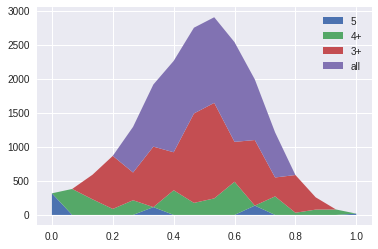

In [4]:
# plot mean new dataset
y_major = [{},{},{},{}]
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_new:
    mean = str(round(a['truthMean'], 5))[:6]
    most_common = Counter(a['truthJudgments']).most_common(1)
    for di in y_major:
        try:
            di[mean] = di[mean]
        except KeyError:
            di[mean] = 0
    
    y_major[0][mean] += 1
    if most_common[0][1] > 2:
        y_major[1][mean] += 1
    if most_common[0][1] > 3:
        y_major[2][mean] += 1
    if most_common[0][1] > 4:
        y_major[3][mean] += 1


ordered_all = collections.OrderedDict(sorted(y_major[0].items()))  
ordered_3 = collections.OrderedDict(sorted(y_major[1].items()))
ordered_4 = collections.OrderedDict(sorted(y_major[2].items()))
ordered_5 = collections.OrderedDict(sorted(y_major[3].items()))


# Area chart
plt.fill_between([float(x) for x in ordered_5.keys()], 0, list(ordered_5.values()), label="5")
plt.fill_between([float(x) for x in ordered_4.keys()], list(ordered_5.values()), list(ordered_4.values()), label="4+")
plt.fill_between([float(x) for x in ordered_3.keys()], list(ordered_4.values()), list(ordered_3.values()), label="3+")
plt.fill_between([float(x) for x in ordered_all.keys()], list(ordered_3.values()), list(ordered_all.values()), label="all")

''' Line graph
plt.plot([float(x) for x in ordered_5.keys()], list(ordered_5.values()), label="5")
plt.plot([float(x) for x in ordered_4.keys()], list(ordered_4.values()), label="4+")
plt.plot([float(x) for x in ordered_3.keys()], list(ordered_3.values()), label="3+")
plt.plot([float(x) for x in ordered_all.keys()], list(ordered_all.values()), label="all")
'''

plt.legend()

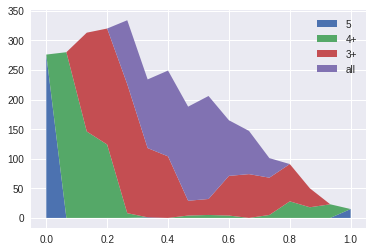

In [95]:
# plot mean old dataset
y_major = [{},{},{},{}]
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_old:
    mean = str(round(a['truthMean'], 5))[:5]
    most_common = Counter(a['truthJudgments']).most_common(1)
    for di in y_major:
        try:
            di[mean] = di[mean]
        except KeyError:
            di[mean] = 0
    
    y_major[0][mean] += 1
    if most_common[0][1] > 2:
        y_major[1][mean] += 1
    if most_common[0][1] > 3:
        y_major[2][mean] += 1
    if most_common[0][1] > 4:
        y_major[3][mean] += 1


ordered_all = collections.OrderedDict(sorted(y_major[0].items()))  
ordered_3 = collections.OrderedDict(sorted(y_major[1].items()))
ordered_4 = collections.OrderedDict(sorted(y_major[2].items()))
ordered_5 = collections.OrderedDict(sorted(y_major[3].items()))


# Area chart
plt.fill_between([float(x) for x in ordered_5.keys()], 0, list(ordered_5.values()), label="5")
plt.fill_between([float(x) for x in ordered_4.keys()], list(ordered_5.values()), list(ordered_4.values()), label="4+")
plt.fill_between([float(x) for x in ordered_3.keys()], list(ordered_4.values()), list(ordered_3.values()), label="3+")
plt.fill_between([float(x) for x in ordered_all.keys()], list(ordered_3.values()), list(ordered_all.values()), label="all")

''' Line graph
plt.plot([float(x) for x in ordered_5.keys()], list(ordered_5.values()), label="5")
plt.plot([float(x) for x in ordered_4.keys()], list(ordered_4.values()), label="4+")
plt.plot([float(x) for x in ordered_3.keys()], list(ordered_3.values()), label="3+")
plt.plot([float(x) for x in ordered_all.keys()], list(ordered_all.values()), label="all")
'''

plt.legend()

56
OrderedDict([('[0.0, 0.0, 0.0, 0.0, 0.0]', 306), ('[0.3333333333, 0.0, 0.0, 0.0, 0.0]', 369), ('[0.3333333333, 0.3333333333, 0.0, 0.0, 0.0]', 348), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.0, 0.0]', 287), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 224), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 119), ('[0.6666666666, 0.0, 0.0, 0.0, 0.0]', 227), ('[0.6666666666, 0.3333333333, 0.0, 0.0, 0.0]', 483), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.0, 0.0]', 622), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 694), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 384), ('[0.6666666666, 0.6666666666, 0.0, 0.0, 0.0]', 189), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.0, 0.0]', 562), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.0]', 845), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333]', 698), ('[0.6666666666, 0.6666666666, 0.6666666666, 0.0

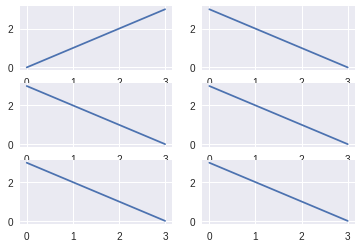

In [57]:
# majority classes new dataset
anno_new_perm = {}

# want: each permutation of judgments: put nr. occurance in matrix, maybe heatmap

for a in annotations_new:
    try:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] += 1
    except KeyError:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] = 1

print(len(anno_new_perm.keys()))
print(collections.OrderedDict(sorted(anno_new_perm.items())))
'''
class: split:
    >=2,x,x,>=2
class: downwards:
    5,xxx
    4xx0
    3xx<1
    2111
class: upwards
class: spike:
    
'''
fig = plt.figure(1)
ax1 = fig.add_subplot(321)
ax1.plot([0,1,2,3])

ax2 = fig.add_subplot(322)
ax2.plot([3,2,1,0])

ax3 = fig.add_subplot(323)
ax3.plot([3,2,1,0])

ax4 = fig.add_subplot(324)
ax4.plot([3,2,1,0])

ax5 = fig.add_subplot(325)
ax5.plot([3,2,1,0])

ax6 = fig.add_subplot(326)
ax6.plot([3,2,1,0])

# find typical classes (plot): triangles of how majorities split, scatterplot

19829
1.0, 2426
0.0, 3589
0.6666666666, 7230
0.3333333333, 6584
19829


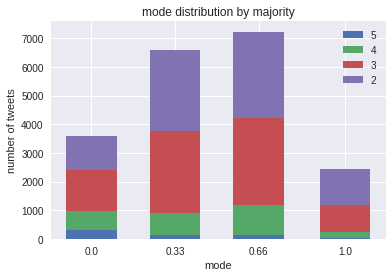

In [39]:
# stacked bar chart of mode distributions
'''
%total

        0.0  0.3  0.6  1.0
'''
y_major = {}
for a in annotations_new:
    mode = a['truthMode']
    majority = Counter(a['truthJudgments'])[a['truthMode']]
    try:
        y_major[str(a['truthMode'])][str(majority)] += 1
        y_major[str(a['truthMode'])]['total'] += 1
    except KeyError:
        y_major[str(a['truthMode'])] = {'2': 0, '3': 0, '4': 0,'5': 0, 'total': 0}
        y_major[str(a['truthMode'])][str(majority)] += 1
        y_major[str(a['truthMode'])]['total'] += 1

total_tweets = len(annotations_new)
print(total_tweets)
sum = 0
for modes in y_major:
    sum += y_major[modes]['total'] 
    print(modes + ", " + str(y_major[modes]['total']))

print(sum)
    
x = [0.0, 0.33, 0.66, 1.0]
    
y_5 = [y_major['0.0']['5'], y_major['0.3333333333']['5'], y_major['0.6666666666']['5'], y_major['1.0']['5']]
y_4 = [y_major['0.0']['4'], y_major['0.3333333333']['4'], y_major['0.6666666666']['4'], y_major['1.0']['4']]
y_3 = [y_major['0.0']['3'], y_major['0.3333333333']['3'], y_major['0.6666666666']['3'], y_major['1.0']['3']]
y_2 = [y_major['0.0']['2'], y_major['0.3333333333']['2'], y_major['0.6666666666']['2'], y_major['1.0']['2']]

width = 0.2       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, y_5, width)
p2 = plt.bar(x, y_4, width, bottom=y_5)

tmp_y4 = [x+y for (x, y) in zip(y_5, y_4)]
p3 = plt.bar(x, y_3, width, bottom=tmp_y4)

tmp_y3 = [x+y for (x, y) in zip(tmp_y4, y_3)]
p4 = plt.bar(x, y_2, width, bottom=tmp_y3)

plt.title('mode distribution by majority')

plt.ylabel('number of tweets')
plt.xlabel('mode')
plt.xticks(x, ('0.0', '0.33', '0.66', '1.0'))
plt.yticks(np.arange(0, 8000, 1000))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('5', '4', '3', '2'))

'\nax1 = fig.add_subplot(331)\nax1.bar([1,2,3,4], [1, -1, 2, -2])\n\nax2 = fig.add_subplot(332)\nax2.bar([1,2,3,4], [1, -1, 2, -2])\n\nax3 = fig.add_subplot(333)\nax3.bar([1,2,3,4], [1, -1, 2, -2])\n\nax4 = fig.add_subplot(334)\nax4.bar([1,2,3,4], [1, -1, 2, -2])\n\nax5 = fig.add_subplot(335)\nax5.bar([1,2,3,4], [1, -1, 2, -2])\n\nax6 = fig.add_subplot(336)\nax6.bar([1,2,3,4], [1, -1, 2, -2])\n\nax7 = fig.add_subplot(337)\nax7.bar([1,2,3,4], [1, -1, 2, -2])\n\nax8 = fig.add_subplot(338)\nax8.bar([1,2,3,4], [1, -1, 2, -2])\n\nax9 = fig.add_subplot(339)\nax9.bar([1,2,3,4], [1, -1, 2, -2])\nplt.ylim([-3,3])'

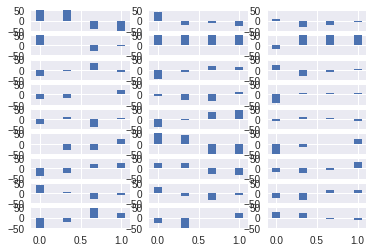

In [70]:
with open("clickbait17-validation-170616/truth.jsonl", "r") as inf:
    annotations_new = [json.loads(x) for x in inf.readlines()]

with open("id_pub_dict.jsonl", "r") as inf:
    id_pub_list = [json.loads(x) for x in inf.readlines()]

id_pub_dict = {}
for i in id_pub_list:
    try:
        id_pub_dict[i['pub']].append(i['id'])
    except:
        id_pub_dict[i['pub']] = []
        id_pub_dict[i['pub']].append(i['id'])

fig = plt.figure(1)
index = 1
id_mode_dict = {}
mode_counter_total = {'0.0': 0, '0.3333333333': 0, '0.6666666666': 0, '1.0': 0}

for a in annotations_new:
    id_mode_dict[a['id']] = a['truthMode']
    mode_counter_total[str(a['truthMode'])] += 1
    
mode_counter_average = {'0.0': mode_counter_total['0.0']/27, 
                        '0.3333333333': mode_counter_total['0.3333333333']/27, 
                        '0.6666666666': mode_counter_total['0.6666666666']/27, 
                        '1.0': mode_counter_total['1.0']/27}

    
for key, value in id_pub_dict.items():
    mode_counter = {'0.0': 0, '0.3333333333': 0, '0.6666666666': 0, '1.0': 0}
    for v in value:
        mode_counter[str(id_mode_dict[str(v)])] += 1
    tmp = fig.add_subplot(9,3,index)
    tmp.bar([0.0, 0.33, 0.66, 1.0], [mode_counter_average['0.0'] - mode_counter['0.0'], 
                                     mode_counter_average['0.3333333333'] - mode_counter['0.3333333333'], 
                                     mode_counter_average['0.6666666666'] - mode_counter['0.6666666666'], 
                                     mode_counter_average['1.0'] - mode_counter['1.0']], width=0.1)
    tmp.set_ylim(-50,50,10)
    index += 1
    

        
'''
ax1 = fig.add_subplot(331)
ax1.bar([1,2,3,4], [1, -1, 2, -2])

ax2 = fig.add_subplot(332)
ax2.bar([1,2,3,4], [1, -1, 2, -2])

ax3 = fig.add_subplot(333)
ax3.bar([1,2,3,4], [1, -1, 2, -2])

ax4 = fig.add_subplot(334)
ax4.bar([1,2,3,4], [1, -1, 2, -2])

ax5 = fig.add_subplot(335)
ax5.bar([1,2,3,4], [1, -1, 2, -2])

ax6 = fig.add_subplot(336)
ax6.bar([1,2,3,4], [1, -1, 2, -2])

ax7 = fig.add_subplot(337)
ax7.bar([1,2,3,4], [1, -1, 2, -2])

ax8 = fig.add_subplot(338)
ax8.bar([1,2,3,4], [1, -1, 2, -2])

ax9 = fig.add_subplot(339)
ax9.bar([1,2,3,4], [1, -1, 2, -2])
plt.ylim([-3,3])'''